# Исследование объявлений о продаже квартир

Источник данных — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. 

**Цель исследования**

Установить параметры для определения рыночной стоимости объектов недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

**Описание данных**
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

# Содержание
1. Предобработка данных
2. Исследовательский анализ данных
3. Выводы

## Изучение данных из файла

In [1]:
# импортируем библиотеки, которые могут пригодиться в дальнейшем
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import os

In [2]:
#посмотрим на таблицу
try:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
except:
    df = pd.read_csv('real_estate_datat.csv', sep = '\t')
pd.set_option('display.max_columns', 50) 
df.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
# изучим общую информацию о таблице:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
# изучим количество пропусков
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Вывод

Необходимо изменить типы данных:
* first_day_exposition изменить на формат даты
* is_apartment измениить на булево значение
* столбцы кроме высоты потолков нужно привести к целочисленному типу, это упростит расчеты и анализ в последующем. 

В таблице есть пропуски в столбцах, с которыми нужно разобраться:

* ceiling_height
* floors_total 
* living_area
* is_apartment
* kitchen_area
* balcony 
* locality_name
* airports_nearest
* cityCenters_nearest
* parks_around3000
* parks_nearest
* ponds_around3000
* ponds_nearest
* days_exposition


<div class="alert alert-success"; style="border-left: 7px solid green">
<h5> ✔️ <font color="green">Комментарий ревьюера (зеленый)</font></h5>

Хороший, красиво оформленный, промежуточный вывод, сразу понятно, что будет далее в предобработке.

</div>

## Предобработка данных

In [5]:
# проверим данные на явные дубликаты
df.duplicated().sum()

0

In [6]:
# приводим к формату даты first_day_exposition
df['first_day_exposition'] = pd.to_datetime(
    df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# разберемся с аппартаментами, переведем тип данных в булево значение
df['is_apartment'] = df.is_apartment.astype(bool)
# проверяем
df.dtypes.head(10)

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
dtype: object

In [7]:
# переходим к пропускам
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

У is_apartment после смены типа данных пропуски заполнились, есть 2 столбца, в которых можно удалить пропуски без риска влияния на результат: floors_total - пропусков 0,03% и locality_name - пропусков 0,02%  - удаляем.

In [8]:

# проверяем
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                 11475
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

Вероятно, что пропуски в столбцах с количеством балконов, а так же с количеством парков и прудов говорят о том, что их нет.
Заменим количество балконов, парков и прудов на 0 

In [9]:
df['balcony'] = df['balcony'].fillna(value = 0).astype(int)
df['parks_around3000'] = df['parks_around3000'].fillna(value = 0).astype(int)
df['ponds_around3000'] = df['ponds_around3000'].fillna(value = 0).astype(int)
# проверяем
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23565 entries, 0 to 23564
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

In [10]:
# категоризируем наличие балкона
def balkony_category(row):
    if row['balcony'] == 0:
        return 'нет'
    if row['balcony'] > 0:
        return 'есть'
df['balcony_category'] = df.apply(balkony_category, axis = 1)
df['balcony_category'].value_counts()

нет     15155
есть     8410
Name: balcony_category, dtype: int64

In [11]:
# категоризируем наличие парков
def parks_category(row):
    if row['parks_around3000'] == 0:
        return 'нет'
    if row['parks_around3000'] > 0:
        return 'есть'
df['parks_category'] = df.apply(parks_category, axis = 1)
df['parks_category'].value_counts()

нет     15539
есть     8026
Name: parks_category, dtype: int64

In [12]:
# категоризируем наличие прудов
def ponds_category(row):
    if row['ponds_around3000'] == 0:
        return 'нет'
    if row['ponds_around3000'] > 0:
        return 'есть'
df['ponds_category'] = df.apply(ponds_category, axis = 1)
df['ponds_category'].value_counts()

нет     14529
есть     9036
Name: ponds_category, dtype: int64

Разберемся с расстояниями до центра, парков, прудов и аэропорта - если они не указаны, то вероятно по близости нет парков, прудов, аэропортов. 
Для того, чтобы оставить целочисленный тип столбца обозначим пропуски как 888.

In [13]:

df['airports_nearest'] = df['airports_nearest'].fillna(value = 888).astype(int)
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(value = 888).astype(int)
df['parks_nearest'] = df['parks_nearest'].fillna(value = 888).astype(int)
df['ponds_nearest'] = df['ponds_nearest'].fillna(value = 888).astype(int)

In [14]:
# убедимся, что нет неявных дубликатов в столбце с адресами
locality_name_unique = df['locality_name'].unique()
locality_name_unique.sort()
locality_name_unique

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [15]:
df['ceiling_height'].describe()

count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

В таблице точно есть некорректные сведения, так как min = 1, max = 100. Даже в элитных квартирах не бывает такой высоты потолков. Они влияют на медиану и среднее. Сделаем срез с корректными данными (возьмем высоту от 2,5 до 11 м) и посчитаем среднее оттуда:

In [16]:
# заменяем пропуски на 0
df['ceiling_height']=df['ceiling_height'].fillna(value=0) 
# делаем срез с корректными значениями
ceiling_correct = df.query('2.5 <= ceiling_height <= 11')
# считаем среднее и округляем
round((ceiling_correct['ceiling_height'].mean()),1)


2.7

In [17]:
# заменяем пропуски на среднее значение:
df.loc[df['ceiling_height']==0, 'ceiling_height'] = round((ceiling_correct['ceiling_height'].mean()),1)
# проверяем
df['ceiling_height'].isna().sum()

0

In [18]:
# сколько теперь корректных данных
len(df.query('2.5 <= ceiling_height <= 11'))

23468

Корректных данных = 99%, значит остальные 1% можно исключить

In [19]:
df = df.query('2.5 <= ceiling_height <= 11')

In [20]:
# сделаем категоризацию по высоте потолков

def ceiling_height_category(row):
    if row['ceiling_height'] < 2.7:
        return 'от 2.5'
    if row['ceiling_height'] < 3:
        return 'от 2.7'
    if row['ceiling_height'] < 3.5:
        return 'от 3'
    if row['ceiling_height'] >= 3.5:
        return 'от 3.5'
df['ceiling_height_category'] = df.apply(ceiling_height_category, axis = 1)
df['ceiling_height_category'].value_counts()

от 2.7    13272
от 2.5     7587
от 3       2201
от 3.5      408
Name: ceiling_height_category, dtype: int64

In [21]:
# разберемся с жилой площадью. посмотрим сначала на то, какие квартиры есть:
df['rooms'].value_counts()

1     7977
2     7852
3     5759
4     1168
5      325
0      193
6      104
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

In [22]:
# сколько всего аномальных данных
len(df.query('rooms>=5'))

519

Их 517 штук, всего 2% от общего количества, можем исключить

In [23]:
df = df.query('4>=rooms>=1')
# проверяем
df['rooms'].value_counts()


1    7977
2    7852
3    5759
4    1168
Name: rooms, dtype: int64

In [24]:
# посмротрим инфу по жил. площади:
df['living_area'].describe()

count    20954.000000
mean        32.684080
std         16.417317
min          2.000000
25%         18.600000
50%         30.000000
75%         41.900000
max        250.000000
Name: living_area, dtype: float64

Видим, что в минимум попала площадь в 2 кв. м. Предельно допустимая норма в РФ- 6 кв метров. Данные некорректны
Максимум - 250 кв м, выглядит адекватно, посмотрим сколько некорректных данных:

In [25]:
len(df.query('living_area<6'))

4

Всего 4, уберем из таблицы:

In [26]:
df = df.query('living_area>=6')

# найдем медиану по каждой группе:
df.groupby('rooms')['living_area'].median()

# заменим пропуски на 0
df['living_area'] = df['living_area'].fillna(value=0)
# заменим 0 на медиану
df['living_area'] = (df.groupby(['rooms', 'living_area'])['living_area']\
    .transform(lambda x: x.fillna(x.median()))).astype('int')
# проверяем
df['living_area'].isna().sum()

0

In [27]:
# поменяем кол-во этажей на целочисленные значения
df['floors_total'] = df['floors_total'].astype('int')

# сделаем категоризацию по этажности
def floor_category(row):
    if row['floor'] == 1:
        return 'Первый'
    if row['floor'] == row['floors_total']:
        return 'Последний'
    else:
        return 'Другой'         
df['floor_category'] = df.apply(floor_category, axis = 1)
df['floor_category'].value_counts()

Другой       15438
Последний     2938
Первый        2574
Name: floor_category, dtype: int64

In [28]:
# количество дней, сколько висело объявление
df['days_exposition'] = df['days_exposition'].fillna(value=0)
df['days_exposition'] = (df.groupby(['locality_name', 'days_exposition'])['days_exposition']\
    .transform(lambda x: x.fillna(x.median()))).astype('int')
# проверяем
df['days_exposition'].isna().sum()

0

In [29]:
# площадь кухни
df['kitchen_area'] = df['kitchen_area'].fillna(value=0)
df['kitchen_area'] = (df.groupby(['rooms', 'kitchen_area'])['kitchen_area']\
    .transform(lambda x: x.fillna(x.median()))).astype('int')
# проверяем
df['kitchen_area'].isna().sum()

0

In [30]:
# категоризируем площадь
def area_category(row):
    if row['total_area'] <= 30:
        return '30'
    if row['total_area'] <=40:
        return '40'
    if row['total_area'] <=50:
        return '50'
    if row['total_area'] <=60:
        return '60'
    if row['total_area'] <=70:
        return '70'
    if row['total_area'] <=80:
        return '80'
    if row['total_area'] <=90:
        return '90'
    else:
        return 'другой'         
df['area_category'] = df.apply(area_category, axis = 1)
df['area_category'].value_counts()

40        4718
50        4715
60        3574
70        2569
другой    1912
80        1818
90        1004
30         640
Name: area_category, dtype: int64

In [31]:
# приведем к целочисленному типу еще 2 столбца
df['last_price'] = df['last_price'].astype('int')
df['total_area'] = df['total_area'].astype('int')

In [32]:
# проверяем
df.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition            0
balcony_category           0
parks_category             0
ponds_category             0
ceiling_height_category    0
floor_category             0
area_category              0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20950 entries, 0 to 23564
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             20950 non-null  int64         
 1   last_price               20950 non-null  int64         
 2   total_area               20950 non-null  int64         
 3   first_day_exposition     20950 non-null  datetime64[ns]
 4   rooms                    20950 non-null  int64         
 5   ceiling_height           20950 non-null  float64       
 6   floors_total             20950 non-null  int64         
 7   living_area              20950 non-null  int64         
 8   floor                    20950 non-null  int64         
 9   is_apartment             20950 non-null  bool          
 10  studio                   20950 non-null  bool          
 11  open_plan                20950 non-null  bool          
 12  kitchen_area             20950 n

### Вывод

1) Проверили данные на явные и неявные дубликаты. 

2) Поменяли тип данных:
* на дату в first_day_exposition
* на булево значение в 'is_apartment'
* на целочисленные значения в столбцах с расстояниями, площадью и стоимостью для упрощения расчетов и анализа данных

3. Разобрались с пропусками в столбцах:
* В двух столбцах пропусков было незначительное количество (floors_total - пропусков 0,03%, locality_name - пропусков 0,02% - мы их просто удалили)
* В столбце 'is_apartment' поменяли тип на булево значение и пропуски заполнились
* Предположили, что в столбцах с количество балконов, парков и прудов - не указанное количество является 0 и заменили значения на 0
* Заменили столбцы с расстояниями до парков, прудов, центра и аэропорта на '888', чтобы оставить целочисленное значение в столбцах и исключить 888 при построении графиков. 
* Для заполнения пропусков с жил. площадью и площадью кухни-группировали данные по категориям квартир (однушки-4х-комнатные) и заполняли медианным значением, так как разница в площади может быть очень существенной
* Пропуски в высоте потолков заменили на среднее значение по срезу с корректными данными
* Исключили явно аномальные данные с количеством комнат > 5  и высотой потолков >10.

4. Сделали категоризацию данных:
* балконы, парки, пруды (есть/нет)
* высота потолков(от 2.5, от 2.7, от 3, от 3.5)
* количество комнат (1,2,3,4)
* этажность (первый, последний, другое)
* площадь квартиры (30, 40, 50, 60, 70, 80, 90, другое)


## Расчёты и добавление результатов в таблицу

Посмотрим, за какой срок данные:

In [34]:
df['first_day_exposition'].min() #27 нояб 2014
df['first_day_exposition'].max() #03 мая 2019

Timestamp('2019-05-03 00:00:00')

Добавим в таблицу день недели, месяц и год, когда выложили объявление:

In [35]:
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

In [36]:
# сколько адресов
total_name = len(locality_name_unique)
total_name

364

In [37]:
# цена квадратного метра
df['metr'] = (df['last_price']/df['total_area']).astype('int')

In [38]:
# соотношение жилой и общей площади в %
df['area_ratio'] = (df['living_area']/df['total_area']*100).astype('int')

In [39]:
# соотношение площади кухни и общей в %
df['kitchen_ratio'] = (df['kitchen_area']/df['total_area']*100).astype('int')

### Вывод
* Посмотрели за какой срок данные
* Добавили в  таблицу день недели, месяц и год
* Посчитали и добавили в таблицу цену за кв метр
* Посчитали и добавили  в таблицу соотношения жилой и общей площади, площади кухни и общей

## Исследовательский анализ данных

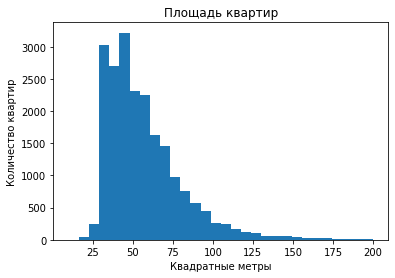

С самой большой площадью:


6188     470
155      317
789      310
15614    293
11254    284
5603     280
8857     268
20236    267
16406    260
9387     260
Name: total_area, dtype: int64

In [40]:
# изучим параметр площади
plt.hist(df['total_area'], bins=30, range=(10,200))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('С самой большой площадью:')
df['total_area'].sort_values(ascending=False).head(10)

In [41]:
df['total_area'].describe()

count    20950.000000
mean        57.246110
std         25.664786
min         12.000000
25%         40.000000
50%         51.000000
75%         68.000000
max        470.000000
Name: total_area, dtype: float64

Выделяются значения до 25 кв метров и более 175, посмотрим сколько корректных данных:

In [42]:
len(df.query('24<=total_area<=175')) 

20786

Корректных данных 99%, можем исключить некорректные 1%:

In [43]:
area_correct = df.query('24<=total_area<=175')
df['total_area'] = area_correct['total_area']
df['total_area'].describe()

count    20786.000000
mean        56.674396
std         23.302963
min         24.000000
25%         40.000000
50%         51.000000
75%         67.000000
max        175.000000
Name: total_area, dtype: float64

<div class="alert alert-danger"; style="border-left: 7px solid FireBrick">
<h5> ❌ <font color="FireBrick">Комментарий ревьюера (красный)</font></h5>

Перед отбросом выбросов очень важно в процентах оценить, сколько мы теряем, должно быть не более 10%.
    

</div>

<div class="alert alert-info"; style="border-left: 7px solid SteelBlue">
<h5>🎓 <font color="SteelBlue">Комментарий от студента (синий)</font></h5>    

Вынесла комментарий в отдельную ячейку, там выходит, что некорректных данных= 1% и можно удалять.

</div>

<div class="alert alert-success"; style="border-left: 7px solid green">
<h5> ✔️ <font color="green">v2 Комментарий ревьюера (зеленый)</font></h5>

✅ Верное исправление 👍

</div>

Самые дорогие:


1431     330000000
22701    289238400
8857     190870000
2527     159984000
16406    159000000
789      135000000
17811    135000000
1922     125000000
20236    124480000
20906    124350000
Name: last_price, dtype: int64

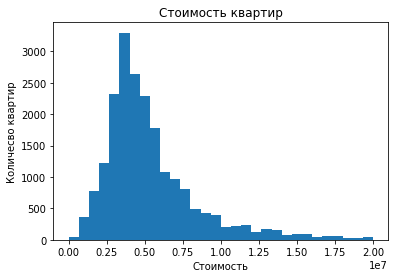

In [44]:
# изучим параметр цены
plt.hist(df['last_price'], bins=30, range=(50,20000000))
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количесво квартир')
print('Самые дорогие:')
df['last_price'].sort_values(ascending=False).head(10)

In [45]:
df['last_price'].describe()

count    2.095000e+04
mean     6.008895e+06
std      6.856901e+06
min      1.219000e+04
25%      3.450000e+06
50%      4.600000e+06
75%      6.599750e+06
max      3.300000e+08
Name: last_price, dtype: float64

<div class="alert alert-success"; style="border-left: 7px solid green">
<h5> ✔️ <font color="green">Комментарий ревьюера (зеленый)</font></h5>

Молодец, верно интерпретированы данные из графика и .describe() 😃

</div>

На гистограмме большинство квартир стоит 4,6 млн, но есть длинный хвост в сторону увеличения цены c незначительным количеством данных.

In [46]:
len(df.query('last_price<175000000'))/len(df)

0.9998568019093079

Можем смело убирать некорректные данные, чтобы они не влияли на среднее и медианное значение.

In [47]:
price_correct = df.query('last_price<175000000')
df['last_price'] = price_correct['last_price']

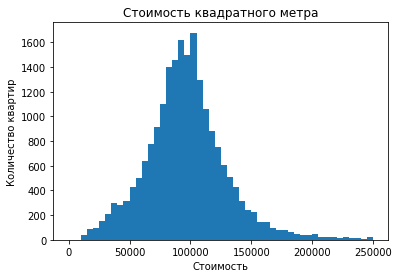

Самые дорогая стоимость кв.м:


1431     1736842
22701    1546729
4971     1000000
16552     841379
17811     813253
8281      725454
6428      719298
8857      712201
2527      661090
21120     642444
Name: metr, dtype: int64

In [48]:
# изучим параметр стоимости квадратного метра
plt.hist(df['metr'], bins=50, range=(0,250000))
plt.title('Стоимость квадратного метра')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()
print('Самые дорогая стоимость кв.м:')
df['metr'].sort_values(ascending=False).head(10)

In [49]:
df['metr'].describe()

count    2.095000e+04
mean     9.911820e+04
std      4.570221e+04
min      1.110000e+02
25%      7.738100e+04
50%      9.545400e+04
75%      1.142850e+05
max      1.736842e+06
Name: metr, dtype: float64

В среднем стоимость кв метра - 95 тыс руб. Есть длинный хвост больше 200 тыс руб.

In [50]:
metr_correct = df.query('metr<200000')
df['metr'] = metr_correct['metr']

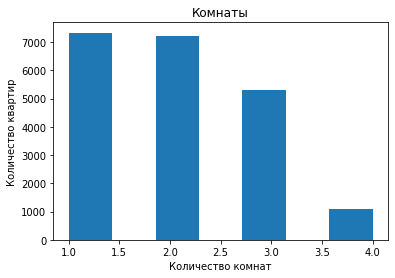

Больше всего комнат:


13614    4
1996     4
18799    4
1561     4
13661    4
8361     4
13676    4
19797    4
8891     4
1563     4
Name: rooms, dtype: int64

In [51]:
# изучим количество комнат
plt.hist(df['rooms'], bins=7)
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()
print('Больше всего комнат:')
df['rooms'].sort_values(ascending=False).head(10)

В прошлом шаге мы приводили комнаты к норм значениям и отсекали аномальные значения, потому распределение здесь адекватно.

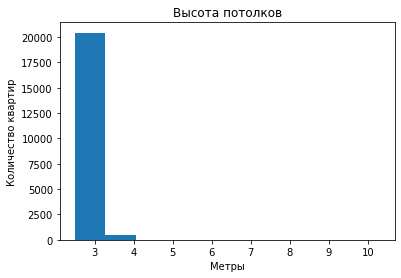

Наибольшие по высоте потолков варианты:
22184    10.3
5833      8.3
15656     8.0
17345     8.0
3459      8.0
20151     6.0
7540      5.5
2791      4.8
19035     4.7
10106     4.5
Name: ceiling_height, dtype: float64


In [52]:
# изучим параметр потолков
plt.hist(df['ceiling_height'], bins=10)
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по высоте потолков варианты:')
print(df['ceiling_height'].sort_values(ascending=False).head(10))

Потолками так же занимались в прошлом шаге, потому тут все ок.

In [53]:
# изучим время продажи квартиры
df['days_exposition'].describe()
#среднее и медиана отличаются в два раза, мешают аномальные, которых очень много

count    20950.000000
mean       158.602578
std        213.742273
min          0.000000
25%         22.000000
50%         77.000000
75%        203.000000
max       1580.000000
Name: days_exposition, dtype: float64

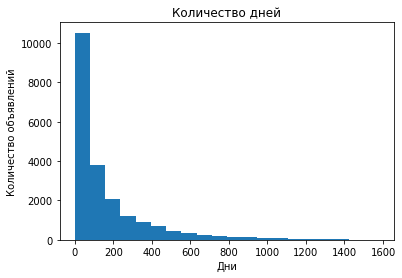

Дольше всех висели:
18739    1580
1104     1572
9507     1553
1879     1513
6657     1512
20852    1512
14014    1497
19017    1485
11887    1484
4713     1477
Name: days_exposition, dtype: int64


In [54]:
# нарисуем гистограмму
plt.hist(df['days_exposition'], bins=20)
plt.title('Количество дней')
plt.xlabel('Дни')
plt.ylabel('Количество объявлений')
plt.show()
print('Дольше всех висели:')
print(df['days_exposition'].sort_values(ascending=False).head(10))

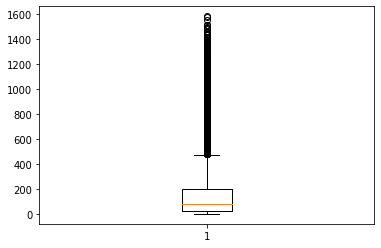

In [55]:
plt.boxplot(df['days_exposition'])
None

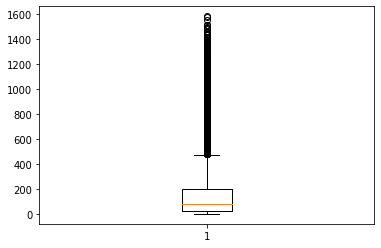

In [56]:
# Код ревьюера

plt.boxplot(df['days_exposition'])
None

Исключим аномальные значения на 0 и то, что больше 500 дней, вряд ли кто-то продает квартиру годами, не обновляя объявления
там, где объявления висят больше 500 дней - скорее всего автор забыл снять объявление после продажи

In [57]:
correct_days = df.query('0<days_exposition<=500')
correct_days['days_exposition'].describe()

count    16558.000000
mean       129.369549
std        120.154828
min          1.000000
25%         39.000000
50%         89.000000
75%        185.000000
max        500.000000
Name: days_exposition, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f33351ecee0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f33352235e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f33351ecb80>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3335223ca0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3372b66040>],
 'means': []}

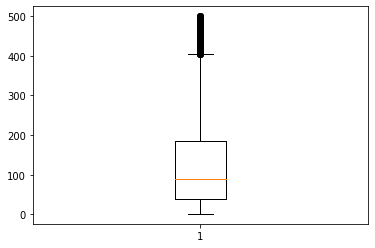

In [58]:
plt.boxplot(correct_days['days_exposition'])

Минимальный срок -сколько висело объявление 1 день, максимальный - 500.
В среднем квартира продается за 89 дней, медиана - 129.
Продажи - меньше 50 дней - необычайно быстрые, более 185 - аномально долгие.

### Вывод

* площадь квартиры - исключили аномальные значения до 25 кв метров и более 175
* стоимость - исключили квартиры дороже 175 миллионов
* стоимость кв м - исключили аномальную стоимость дороже 200 тыс руб
* изучили время продажи квартиры и сделали срез по корректным данным. Минимальный срок -сколько висело объявление 1 день, максимальный - 500.В среднем квартира продается за 89 дней, медиана - 129.Продажи - меньше 50 дней - необычайно быстрые, более 185 - аномально долгие.

### Исследуем какие параметры влияют на стоимость

In [59]:
# зависимость цены от площади
df_price_pivot = df.pivot_table(index=['area_category'],values= 'metr', aggfunc=('median','count'))
df_price_pivot.sort_values(by ='median')

,count,median
area_category,,
60,3554,89473.0
80,1774,90397.0
50,4695,90888.0
70,2538,91803.0
90,973,97530.0
40,4699,100000.0
30,635,102130.0
другой,1659,110236.0


Сама высокая стоимость квадратного метра у маленьких квартир -30-40 кв. метров.
У квартир свыше 90 кв метров, стоимость квадратного метра дорожает, вероятно, там элитная недвижимость и на стоимость влияет не только общая площадь.

In [60]:
# зависимость цены от числа комнат
df_rooms_pivot = df.pivot_table(index=['rooms'],values= 'metr', aggfunc='median')
df_rooms_pivot.sort_values(by ='metr' )

,metr
rooms,
3,88607.0
4,90468.0
2,93000.0
1,100000.0


Подтверждается анализ по площади квартир. В однушке самая дорогая стоимость за кв метр, в двушке дешевле, в трешке еще дешевле. При этом, начиная с 4х комнат, стоимость за метр начинает расти (элитная недвижимость).

In [61]:
# зависимость цены от наличия балкона
df_balkony_pivot = df.pivot_table(index=['balcony_category'], columns = 'rooms', values= 'metr', aggfunc='median')
df_balkony_pivot

rooms,1,2,3,4
balcony_category,,,,
есть,101250.0,94117.0,88524.0,89434.0
нет,100000.0,92476.0,88732.0,91193.5


Однушки и 2х комнатные дороже с балконом, 3 и 4-комнатные- без. Не можем сделать однозначного вывода что наличие балкона влияет на цену.

In [62]:
# зависимость цены от наличия пруда
df_ponds_pivot = df.pivot_table(index=['ponds_category'], columns = 'rooms', values= 'metr', aggfunc='median')
df_ponds_pivot

rooms,1,2,3,4
ponds_category,,,,
есть,108245.0,102459.0,96153.0,97717.0
нет,96774.0,86206.0,83291.0,83673.0


Наличие пруда в пределах 3 тыс км влияет на стоимость квартиры - квартиры дороже.

In [63]:
# зависимость цены от наличия парка
df_parks_pivot = df.pivot_table(index=['parks_category'], columns = 'rooms', values= 'metr', aggfunc='median')
df_parks_pivot

rooms,1,2,3,4
parks_category,,,,
есть,110526.0,103448.0,97402.0,99991.0
нет,96944.0,85714.0,82608.0,83222.0


Наличие парка в пределах 3 тыс км влияет на стоимость квартиры - квартиры дороже с парком.

In [64]:
# зависимость цены от высоты потолка
df_ceiling_pivot = df.pivot_table(index=['ceiling_height_category'], columns = 'rooms', values= 'metr', aggfunc='median')
df_ceiling_pivot

rooms,1,2,3,4
ceiling_height_category,,,,
от 2.5,99714.0,88636.0,83582.0,78741.0
от 2.7,101333.0,93181.0,89333.0,92666.0
от 3,118750.0,115503.0,106222.0,102061.0
от 3.5,122253.0,116358.0,112307.0,105595.0


Чем выше потолок, тем дороже стоимость за кв метр (логично, низкие потолки- или в старых квартирах или в новых эконом-класса.

In [65]:
# зависимость цены от этажа
df_floor_pivot = df.pivot_table(index=['floor_category'], columns = 'rooms', values= 'metr', aggfunc='mean')
df_floor_pivot

rooms,1,2,3,4
floor_category,,,,
Другой,103018.266164,98516.804418,94187.790140,98424.002894
Первый,87682.918478,77688.779093,77297.319213,79635.661972
Последний,91371.938776,83015.445761,86708.856594,97293.757225


Зависимость ожидаемо есть. На первом этаже- самая низкая стоимость за кв метр, на последнем -выше, чем на первом, но ниже, чем на других. Самая высокая стоимость- у квартир, расположенных не на первом и не на последнем этажах.

,median,count
weekday,,
1,95454.0,3695
2,95408.0,3439
0,95000.0,3159
3,94827.0,3705
6,94736.0,1420
4,94285.0,3472
5,92530.0,1637


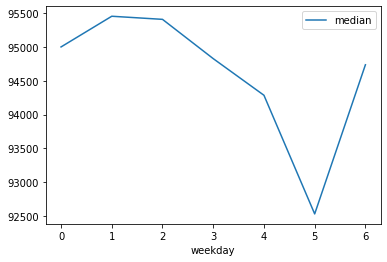

In [66]:
# зависимость цены от дня недели
weekday_pivot = df.pivot_table(index = 'weekday', values = 'metr', aggfunc = ['median', 'count'])
weekday_pivot.columns = ['median', 'count']
weekday_pivot.plot(y = 'median')
weekday_pivot.sort_values('median', ascending = False)

В объявлениях, которые выкладываются в сб - резкое снижение стоимости за кв метр.
Это может быть связано с тем, что в субботу выкладываются объявления осознанно, возможно посоветовавшись с риэлтором и на те квартиры, которые хотят продать достаточно быстро(потому не завышают цены), а не просто выкладывают объявления -посмотреть-будет ли спрос по указанной цене и тд.

,median,count
month,,
4,96341.0,2101
9,95809.5,1784
1,95729.0,1240
8,95444.0,1524
12,95211.5,1294
3,95141.0,2224
2,95000.0,2238
11,94915.0,2107
7,94285.0,1453


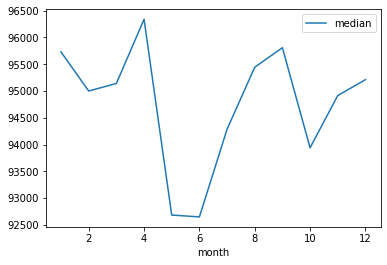

In [67]:
# зависимость цены от месяца
month_pivot = df.pivot_table(index = 'month', values = 'metr', aggfunc = ['median', 'count'])
month_pivot.columns = ['median', 'count']
month_pivot.plot(y = 'median')
month_pivot.sort_values('median', ascending = False)

Месяц влияет на стоимость квартир.
В апреле стоимость на квартиры самая дорогая (возможно связано с хорошей погодой-людям не лень ездить -смотреть квартиры, переезжать и т.д, возможно, к апрелю человек уже накопил денег после нг, в летние месяцы стоимость падает (июнь-месяц с самыми дешевыми ценами)- люди уезжают в отпуска, отдыхают и не занимаются куплей-продажей.

,median,count
year,,
2014,105477.0,116
2019,102947.5,2540
2018,96153.0,7163
2017,92245.5,7198
2015,92184.5,1016
2016,91277.0,2494


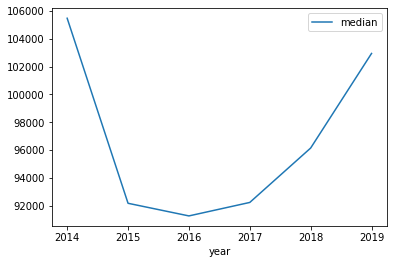

In [68]:
# зависимость цены от года
years_pivot = df.pivot_table(index = 'year', values = 'metr', aggfunc = ['median', 'count'])
years_pivot.columns = ['median', 'count']
years_pivot.plot(y = 'median')
years_pivot.sort_values('median', ascending = False)

<div class="alert alert-success"; style="border-left: 7px solid green">
<h5> ✔️ <font color="green">Комментарий ревьюера (зеленый)</font></h5>

Спасибо за интересные наблюдения 😃

</div>

После кризиса 2014 года у людей не было денег покупать жилье, цены резко упали и падали до 2016, после стали потихоньку расти.

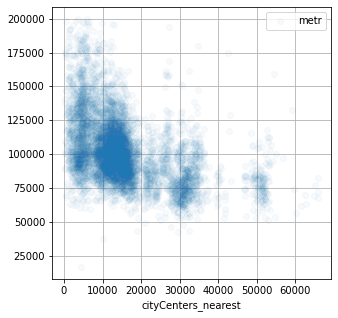

In [69]:
# зависимость цены от удаленности от центра (помним, что заменяли пропуски числом 888)
correct_centr = df.query('cityCenters_nearest!=888')
centr_pivot =  correct_centr.pivot_table(index='cityCenters_nearest', values='metr', aggfunc='median').plot(grid=True, style='o', figsize=(5, 5), alpha=0.03)
plt.show()

In [70]:
correct_centr['cityCenters_nearest'].corr(correct_centr['metr'])

-0.4084896341383638

Мы видим умеренную отрицательную корреляцию. Чем ближе к центру, тем выше стоимость.

Зависимость цены от адреса. Создаем список из топ-10 населенных пунктов с наибольшим количеством объявлений и считаем по каждому среднюю цену за кв метр.

In [71]:
locality_pivot = df.pivot_table(index = 'locality_name', values = 'metr', aggfunc=('count', 'mean'))
locality_pivot.sort_values('count', ascending = False).head(10)

,count,mean
locality_name,,
Санкт-Петербург,13526,108404.335502
посёлок Мурино,433,86465.478060
посёлок Шушары,399,78878.383459
Всеволожск,364,67697.173077
Пушкин,335,103031.773134
Колпино,324,75667.435185
посёлок Парголово,296,91130.834459
Гатчина,290,69001.086207
деревня Кудрово,246,93084.138211


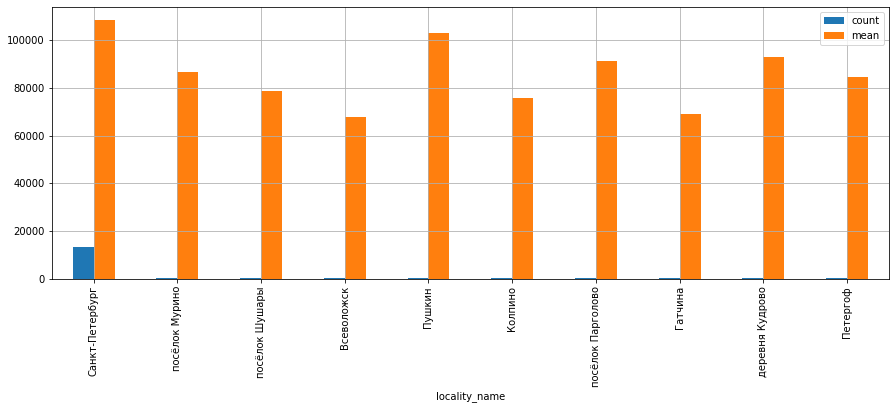

In [72]:
(locality_pivot.sort_values('count', ascending = False).head(10)).plot(kind="bar", figsize=(15, 5), grid=True)
None

Видим, что ожидаемо, в С-П больше всего объявлений, в Петергофе меньше всего в этом топе.
Максимальная цена за кв метр - в Санкт-Петербурге, минимальная- во Всеволжске.

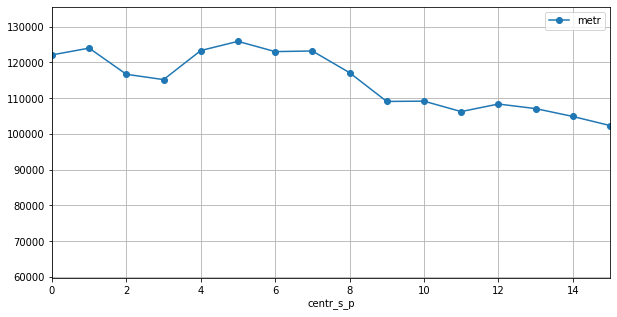

In [73]:
# определим какая область входит в центр Петербурга
df['centr_s_p']=(df['cityCenters_nearest']/1000).astype(int)
(df.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='centr_s_p', values='metr')
    .plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5))
)
plt.show()

In [74]:
# на графике видим, что от 8,5 график резко пошел вверх, значит это уже центр
spb = df.query('(locality_name == "Санкт-Петербург") & (centr_s_p <= 8.5)')

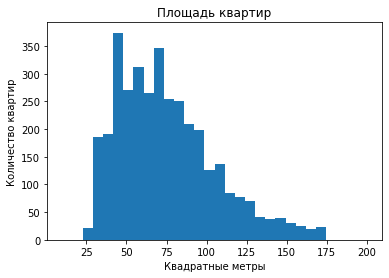

С самой большой площадью:


4373     174.0
15214    173.0
9588     172.0
4816     172.0
20838    172.0
3102     172.0
20507    172.0
22537    172.0
22087    171.0
11271    171.0
Name: total_area, dtype: float64

In [75]:
# изучим площадь
plt.hist(spb['total_area'], bins=30, range=(10,200))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('С самой большой площадью:')
spb['total_area'].sort_values(ascending=False).head(10)

In [76]:
spb['total_area'].describe()

count    3592.000000
mean       74.804566
std        30.626953
min        24.000000
25%        50.000000
50%        70.000000
75%        93.000000
max       174.000000
Name: total_area, dtype: float64

В центре Санкт-Петербурга квартиры продаются с большей площадью, здесь уже среднее значение -70 кв м , а не 50.

Самые дорогие:


2527     159984000.0
16406    159000000.0
17811    135000000.0
789      135000000.0
1922     125000000.0
20236    124480000.0
20906    124350000.0
4971     124000000.0
16552    122000000.0
20151    119000000.0
Name: last_price, dtype: float64

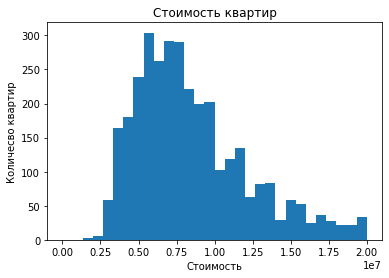

In [77]:
# изучим цену
# изучим параметр цены
plt.hist(spb['last_price'], bins=30, range=(50,20000000))
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количесво квартир')
print('Самые дорогие:')
spb['last_price'].sort_values(ascending=False).head(10)

In [78]:
spb['last_price'].describe()

count    3.661000e+03
mean     1.129514e+07
std      1.164472e+07
min      1.600000e+06
25%      5.990000e+06
50%      8.200000e+06
75%      1.199900e+07
max      1.599840e+08
Name: last_price, dtype: float64

Логично и ожидаемо что стоимость квартир в центре Санкт-Петербурга дороже, чем по обще базе, при этом диаграмма выглядит корректной.

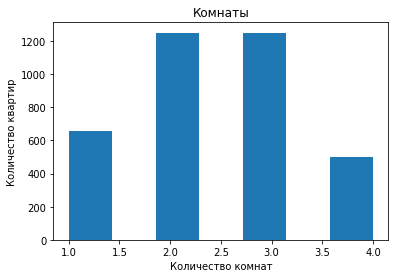

Больше всего комнат:


10752    4
17937    4
11686    4
19755    4
21733    4
19758    4
17903    4
17894    4
8756     4
19843    4
Name: rooms, dtype: int64

In [79]:
# изучим число комнат
# изучим количество комнат
plt.hist(spb['rooms'], bins=7)
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()
print('Больше всего комнат:')
spb['rooms'].sort_values(ascending=False).head(10)

Гораздо больше двух, трех- и четырех - комнатных квартир, чем в общей базе. И наоборот меньше однушек.

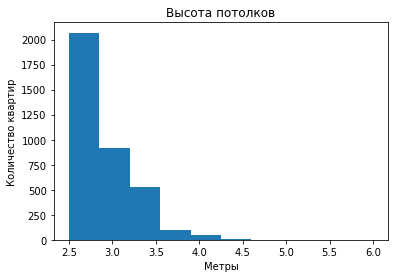

Наибольшие по высоте потолков варианты:
22184    10.3
5833      8.3
15656     8.0
17345     8.0
3459      8.0
20151     6.0
7540      5.5
2791      4.8
19035     4.7
10106     4.5
Name: ceiling_height, dtype: float64


In [80]:
# изучим высоту потолков
plt.hist(spb['ceiling_height'], bins=10)
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по высоте потолков варианты:')
print(df['ceiling_height'].sort_values(ascending=False).head(10))

Гистограмма выглядит ок. Гораздо больше квартир с высокики потолками больше 3х метров.

In [81]:
# зависимость стоимости от числа комнат
spb_rooms_pivot = spb.pivot_table(index=['rooms'],values= 'metr', aggfunc='median')
spb_rooms_pivot.sort_values(by ='metr' )

,metr
rooms,
4,103179.0
3,110436.0
2,119090.0
1,132934.0


Так же, как в анализе по общей базе, однушки- самые дорогие, чем больше комнат- тем ниже стоимость кв метра.

In [82]:
# зависимость от высоты потолков
spb_ceiling_pivot = df.pivot_table(index=['ceiling_height_category'], columns = 'rooms', values= 'metr', aggfunc='median')
spb_ceiling_pivot

rooms,1,2,3,4
ceiling_height_category,,,,
от 2.5,99714.0,88636.0,83582.0,78741.0
от 2.7,101333.0,93181.0,89333.0,92666.0
от 3,118750.0,115503.0,106222.0,102061.0
от 3.5,122253.0,116358.0,112307.0,105595.0


Так же, как в анализе по общей базы, чем выше потолок, тем дороже стоимость.

In [83]:
# зависимость от этажа
spb_floor_pivot = spb.pivot_table(index=['floor_category'], columns = 'rooms', values= 'metr', aggfunc='mean')
spb_floor_pivot

rooms,1,2,3,4
floor_category,,,,
Другой,138069.832972,126337.897727,118353.805591,110744.027864
Первый,120021.547368,108014.529801,104267.188119,98925.500000
Последний,135477.983333,116800.863636,113871.212963,117953.831325


Так же, как в общей базе, стоимость кв метра на первом этаже самая низкая, на втором месте- последний этаж, самые высокие цены у квартир на этажах кроме первого и последнего. 

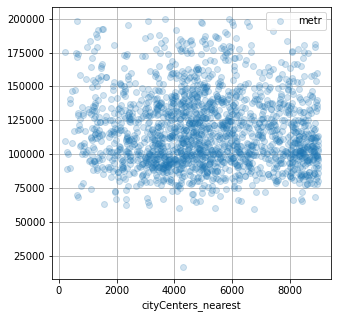

In [84]:
# зависимость от удаленности от центра
correct_spb = spb.query('cityCenters_nearest!=888')
correct_spb_pivot =  correct_spb.pivot_table(index='cityCenters_nearest', values='metr', aggfunc='median').plot(grid=True, style='o', figsize=(5, 5), alpha = 0.2)
plt.show()

In [85]:
correct_spb['cityCenters_nearest'].corr(correct_spb['metr'])

-0.009381644173542661

Видим мизерный коэффициент корреляции, что логично, так как мы определили центр и все квартиры находятся в его пределах.

In [86]:
#зависимость от наличия пруда
spb_ponds_pivot = spb.pivot_table(index=['ponds_category'], columns = 'rooms', values= 'metr', aggfunc='median')
spb_ponds_pivot

rooms,1,2,3,4
ponds_category,,,,
есть,135483.0,122222.0,112478.5,103224.0
нет,127386.0,112500.0,104740.5,102994.5


Зависимость от наличия пруда есть.

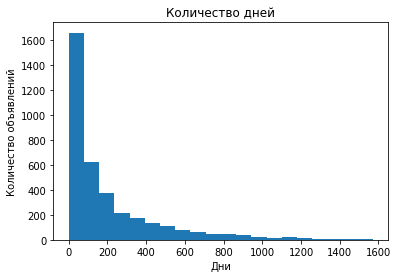

Дольше всех висели:
1104     1572
20852    1512
14014    1497
4713     1477
2929     1458
14787    1430
11917    1417
10308    1391
16080    1375
12140    1363
Name: days_exposition, dtype: int64


In [87]:
# зависимость от даты размещения объявления
plt.hist(spb['days_exposition'], bins=20)
plt.title('Количество дней')
plt.xlabel('Дни')
plt.ylabel('Количество объявлений')
plt.show()
print('Дольше всех висели:')
print(spb['days_exposition'].sort_values(ascending=False).head(10))

{'whiskers': [<matplotlib.lines.Line2D at 0x7f3372d17160>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3372d17820>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3372d06dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3372d17ee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3372d22280>],
 'means': []}

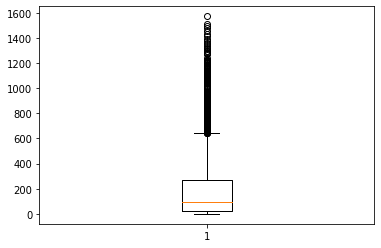

In [88]:
plt.boxplot(spb['days_exposition'])

In [89]:
# здесь мы видим, что аномальные значения -после 650, а не после 500 дней
# исключим аномальные значения на 0 и то, что больше 650 дней
correct_days_spb = spb.query('0<days_exposition<=650')
correct_days_spb['days_exposition'].describe()

count    2804.000000
mean      168.575963
std       158.027853
min         3.000000
25%        45.000000
50%       111.000000
75%       246.000000
max       649.000000
Name: days_exposition, dtype: float64

Здесь минимальное значения в 3 раза больше- 3 дня, максимальное - 649, среднее- 111, минимальное - 168. Дольше. чнем при анализе всей базы- это может бытьс вязано с тем, что квартире в СПБ дороже, целевой аудитории для них-меньше,  поэтому сделки совершаются дольше.

,median,count
weekday,,
6,120967.0,191
5,118867.0,241
0,118857.5,504
3,117391.0,665
4,117045.0,551
1,116247.5,582
2,115833.0,565


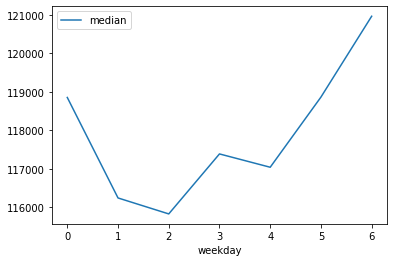

In [90]:
# зависимость цены от дня недели
weekday_pivot = spb.pivot_table(index = 'weekday', values = 'metr', aggfunc = ['median', 'count'])
weekday_pivot.columns = ['median', 'count']
weekday_pivot.plot(y = 'median')
weekday_pivot.sort_values('median', ascending = False)

По общей базе- самый низкий показатель был в субботу, по СПБ- самый низкий показатель в среду. 
Может, связано с тем, что дорогие квартиры в центре- выкладывают бизнесмены, у которых в среду нет свободного времени на это.

,median,count
month,,
3,125526.0,354
5,124615.0,205
9,120785.0,319
1,120027.0,198
4,117479.0,322
8,117138.0,248
12,116188.5,214
7,116025.0,249
2,115714.0,329


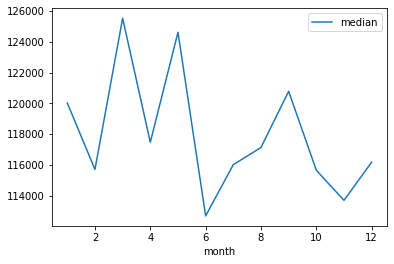

In [91]:
# зависимость цены от месяца
month_pivot = spb.pivot_table(index = 'month', values = 'metr', aggfunc = ['median', 'count'])
month_pivot.columns = ['median', 'count']
month_pivot.plot(y = 'median')
month_pivot.sort_values('median', ascending = False)

Так же как в общей базе, самые низкие цены- в июне.
Отличие, что в апреле - цены тоже низкие, а самые высокие - в марте (люди, у кого есть деньг8и на квартиры в центре СПБ накопили деньги на месяц раньше, чем остальные:)

,median,count
year,,
2019,127868.0,373
2014,126458.0,24
2018,118750.0,1029
2017,114743.0,1160
2015,114130.0,269
2016,112970.5,444


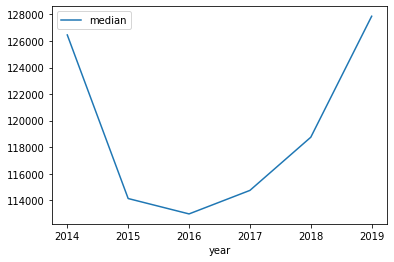

In [92]:
# зависимость цены от года
years_pivot = spb.pivot_table(index = 'year', values = 'metr', aggfunc = ['median', 'count'])
years_pivot.columns = ['median', 'count']
years_pivot.plot(y = 'median')
years_pivot.sort_values('median', ascending = False)

Здесь картина- как в общей базе. 
После кризиса 2014 цены пошли на спад и после 2016 начали потихоньку расти.

## Общий вывод

#### Проверили данные на явные и неявные дубликаты.

#### Поменяли тип данных:

* на дату в first_day_exposition
* на булево значение в 'is_apartment'
* на целочисленные значения в столбцах с расстояниями, площадью и стоимостью для упрощения расчетов и анализа данных

#### Разобрались с пропусками в столбцах:
* В двух столбцах пропусков было незначительное количество (floors_total - пропусков 0,03%, locality_name - пропусков 0,02% - мы их просто удалили)
* В столбце 'is_apartment' поменяли тип на булево значение и пропуски заполнились
* Предположили, что в столбцах с количество балконов, парков и прудов - не указанное количество является 0 и заменили значения на 0
* Заменили столбцы с расстояниями до парков, прудов, центра и аэропорта на '888', чтобы оставить целочисленное значение в столбцах и исключить 888 при построении графиков.
* Для заполнения пропусков с жил. площадью и площадью кухни-группировали данные по категориям квартир (однушки-4х-комнатные) и заполняли медианным значением, так как разница в площади может быть очень существенной
* Пропуски в высоте потолков заменили на среднее значение по срезу с корректными данными

#### Исключили явно аномальные данные с количеством комнат > 5 и высотой потолков >10.

#### Сделали категоризацию данных:
* балконы, парки, пруды (есть/нет)
* высота потолков(от 2.5, от 2.7, от 3, от 3.5)
* количество комнат (1,2,3,4)
* этажность (первый, последний, другое)
* площадь квартиры (30, 40, 50, 60, 70, 80, 90, другое)

#### Провели исследовательский анализ:
* площадь квартиры - исключили аномальные значения до 25 кв метров и более 175
* стоимость - исключили квартиры дороже 175 миллионов
* стоимость кв м - исключили аномальную стоимость дороже 200 тыс руб
* изучили время продажи квартиры и сделали срез по корректным данным. Минимальный срок -сколько висело объявление 1 день, максимальный - 500.В среднем квартира продается за 89 дней, медиана - 129.Продажи - меньше 50 дней - необычайно быстрые, более 185 - аномально долгие.

#### Установили параметры для определения рыночной стоимости объектов недвижимости:

1) **площадь**

Сама высокая стоимость квадратного метра у маленьких квартир -30-40 кв. метров. У квартир свыше 90 кв метров, стоимость квадратного метра дорожает, вероятно, там элитная недвижимость и на стоимость влияет не только общая площадь.

2) **число комнат**

В однушке самая дорогая стоимость за кв метр, в двушке дешевле, в трешке еще дешевле. При этом, начиная с 4х комнат, стоимость за метр начинает расти (элитная недвижимость).

3) **наличие пруда в радиусе 3 км**

Наличие пруда в пределах 3 тыс км влияет на стоимость квартиры - квартиры дороже.

4) **наличия парка**

Наличие парка в пределах 3 тыс км влияет на стоимость квартиры - квартиры дороже с парком.

5) **зависимость цены от высоты потолка**

Чем выше потолок, тем дороже стоимость за кв метр (логично, низкие потолки- или в старых квартирах или в новых эконом-класса.
Категоризация на (от 2.5, от 2.7, от 3, от 3.5) имеет место быть- в каждом сегменте цены становятся выше.

6) **этаж**

Зависимость ожидаемо есть. На первом этаже- самая низкая стоимость за кв метр, на последнем -выше, чем на первом, но ниже, чем на других. Самая высокая стоимость- у квартир, расположенных не на первом и не на последнем этажах.

7) **день недели**

В объявлениях, которые выкладываются в сб - резкое снижение стоимости за кв метр. Это может быть связано с тем, что в субботу выкладываются объявления осознанно, возможно посоветовавшись с риэлтором и на те квартиры, которые хотят продать достаточно быстро(потому не завышают цены), а не просто выкладывают объявления -посмотреть-будет ли спрос по указанной цене и тд.

8) **месяц**

Месяц влияет на стоимость квартир. В апреле стоимость на квартиры самая дорогая (возможно связано с хорошей погодой-людям не лень ездить -смотреть квартиры, переезжать и т.д, возможно, к апрелю человек уже накопил денег после нг, в летние месяцы стоимость падает (июнь-месяц с самыми дешевыми ценами)- люди уезжают в отпуска, отдыхают и не занимаются куплей-продажей.

9) **год**

После кризиса 2014 года у людей не было денег покупать жилье, цены резко упали и падали до 2016, после стали потихоньку расти.

10) **удаленность от центра**

По общей базе- есть умеренная зависимость- чем ближе к центру, тем стоимость выше.
В СПБ центром считается облась в 8 кв км. В радиусе этого центра зависимости не обнаружено.


Не была однозначно выявлена зависимость стоимости от наличия балкона. Возможно, в Питере и области- в силу дождливой погоды- балкон действительно имеет мало значения.


##### Центр Санкт-Петербурга

В центре Санкт-Петербурга квартиры продаются с большей площадью, здесь уже среднее значение -70 кв м , а не 50. Гораздо больше двух, трех- и четырех - комнатных квартир, чем в общей базе. И наоборот - меньше однушек. Гораздо больше квартир с высокики потолками больше 3х метров.
Логично и ожидаемо что стоимость квартир в центре Санкт-Петербурга дороже, чем по обще базе.
* Так же, как в анализе по общей базе, однушки- самые дорогие, чем больше комнат- тем ниже стоимость кв метра.
* Так же, как в анализе по общей базе, чем выше потолок, тем дороже стоимость.
* Так же, как в общей базе, стоимость кв метра на первом этаже самая низкая, на втором месте- последний этаж, самые высокие цены у квартир на этажах кроме первого и последнего.
* Логично, что так как мы выделили центр, колебания в стоимости незначительны.
* Количество "жизни" объявления:  минимальное значения в 3 раза больше, чем при общем анализе -  3 дня, максимальное - 649, среднее- 111. Это может быть с вязано с тем, что квартире в СПБ дороже, целевой аудитории для них-меньше, поэтому сделки совершаются дольше.
* Зависимость от дня/недели/года выкладки объявления - по общей базе- самый низкий показатель был в субботу, по СПБ- самый низкий показатель в среду. Может, связано с тем, что дорогие квартиры в центре- выкладывают бизнесмены, у которых в среду нет свободного времени на это.Так же как в общей базе, самые низкие цены- в июне. Отличие, что в апреле - цены тоже низкие, а самые высокие - в марте (люди, у кого есть деньги на квартиры в центре СПБ накопили деньги на месяц раньше, чем остальные:) После кризиса 2014 цены пошли на спад и после 2016 начали потихоньку расти.
